# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('google_trends/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('google_trends/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('google_trends/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('google_trends/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
# Shapes of dataframe

df_tesla.shape

(124, 3)

In [4]:
# column names

df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [5]:
print(f'Largest value for Tesla in Web Search:{df_tesla["TSLA_WEB_SEARCH"].max()} ')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()} ')

Largest value for Tesla in Web Search:31 
Smallest value for Tesla in Web Search: 2 


In [6]:
# decribe()
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [7]:
df_unemployment.shape

(181, 3)

In [8]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [9]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [10]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [11]:
print(df_btc_search.shape)
print(df_btc_price.shape)

(73, 2)
(2204, 3)


In [12]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [13]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


In [14]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [15]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.sum()}')
print(f'Missing values for U/E?: {df_unemployment.isnull().values.sum()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.sum()}')

Missing values for Tesla?: 0
Missing values for U/E?: 0
Missing values for BTC Search?: 0


In [16]:
print(f'Missing values for BTC price?: {df_btc_price.isnull().sum()}')

Missing values for BTC price?: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [17]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [18]:
new_df_btc_price = df_btc_price.dropna()

In [19]:
new_df_btc_price.isna().values.sum()

0

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [20]:
# Convert MONTH/DATE datatypes from object to Datetime

df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])

In [21]:
# Confirm if the process was successful

df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            124 non-null    datetime64[ns]
 1   TSLA_WEB_SEARCH  124 non-null    int64         
 2   TSLA_USD_CLOSE   124 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB


In [22]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [23]:
df_btc_price = df_btc_price.resample("M", on="DATE").last()

In [24]:
print(df_btc_price.shape)
df_btc_price.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [25]:
df_btc_search_monthly = df_btc_search.resample("M", on="MONTH").last()

In [26]:
df_btc_search_monthly.head()

,MONTH,BTC_NEWS_SEARCH
MONTH,,
2014-09-30,2014-09-01,5
2014-10-31,2014-10-01,4
2014-11-30,2014-11-01,4
2014-12-31,2014-12-01,4
2015-01-31,2015-01-01,5


# Data Visualisation

### Notebook Formatting & Style Helpers

In [27]:
# Create locators for ticks on the time axis

In [28]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

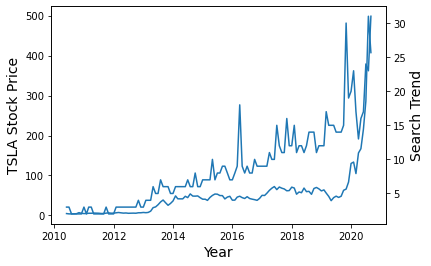

In [29]:
ax1 = plt.gca() # get current axis
ax2 = plt.twinx() # create another axis that shares the same x axis.

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE']);
ax2.plot(df_tesla['MONTH'], df_tesla["TSLA_WEB_SEARCH"]);

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("TSLA Stock Price", fontsize=14)
ax2.set_ylabel("Search Trend", fontsize=14);




**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

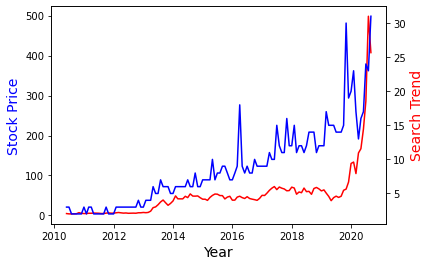

In [30]:

ax1 = plt.gca() # get current axis
ax2 = plt.twinx() # create another axis that shares the same x axis.

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='r');
ax2.plot(df_tesla['MONTH'], df_tesla["TSLA_WEB_SEARCH"], color="b");
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Stock Price", fontsize=14, color='b')
ax2.set_ylabel("Search Trend", fontsize=14, color="r");

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

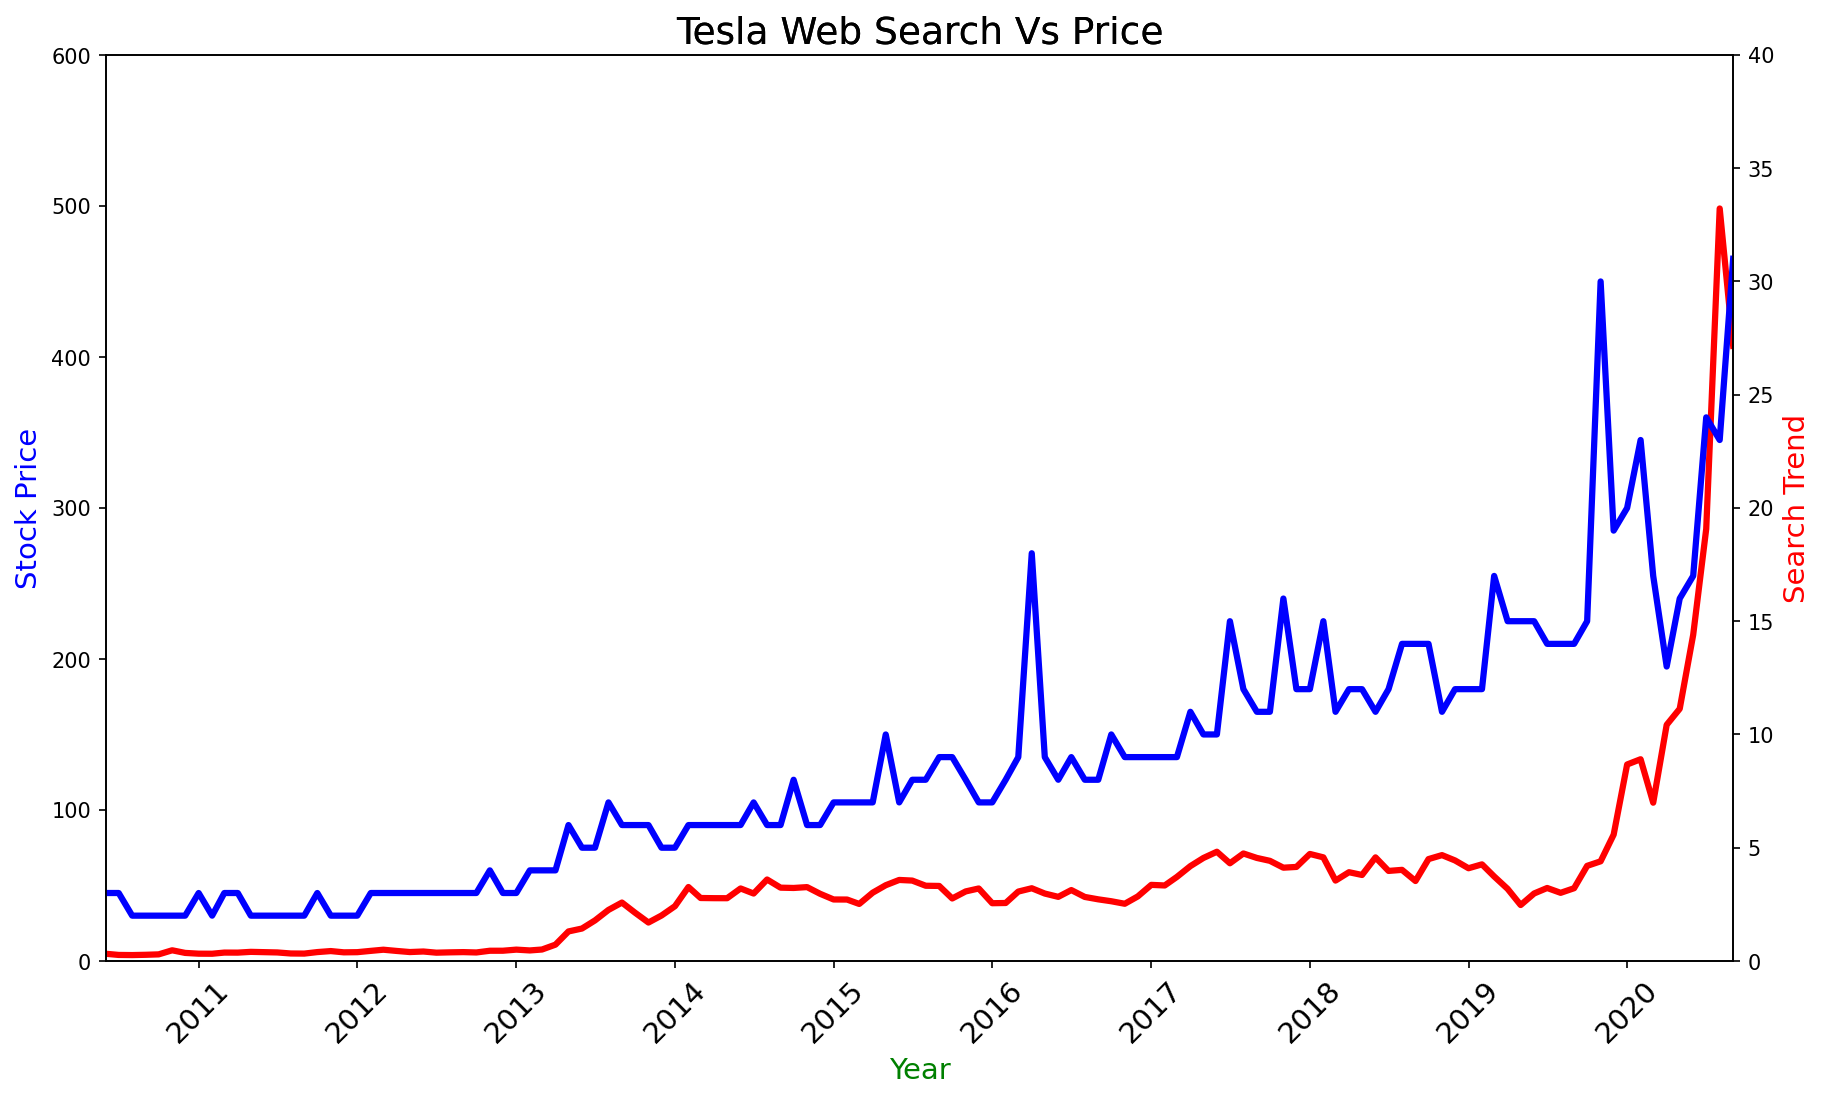

In [31]:
# Change figure size and resolution
plt.figure(figsize=(14, 8), dpi=150)

# Title
plt.title("Tesla Web Search Vs Price", fontsize=18)

# Increase the size and rotate the labels on the x-axis.

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = plt.twinx() # create another axis that shares the same x axis.

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("Stock Price", fontsize=14, color='b')
ax2.set_ylabel("Search Trend", fontsize=14, color="r");
plt.title("Tesla Web Search Vs Price", fontsize=18)

ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim(0, 600)
ax2.set_ylim(0, 40)

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='r', linewidth=3);
ax2.plot(df_tesla['MONTH'], df_tesla["TSLA_WEB_SEARCH"], color="b", linewidth=3);

plt.show()

### How to add tick formatting for dates on the x-axis. 

In [32]:
# create locators for ticks on time axis

months = mdates.MonthLocator()
years = mdates.YearLocator()

years_fmt = mdates.DateFormatter("%Y")


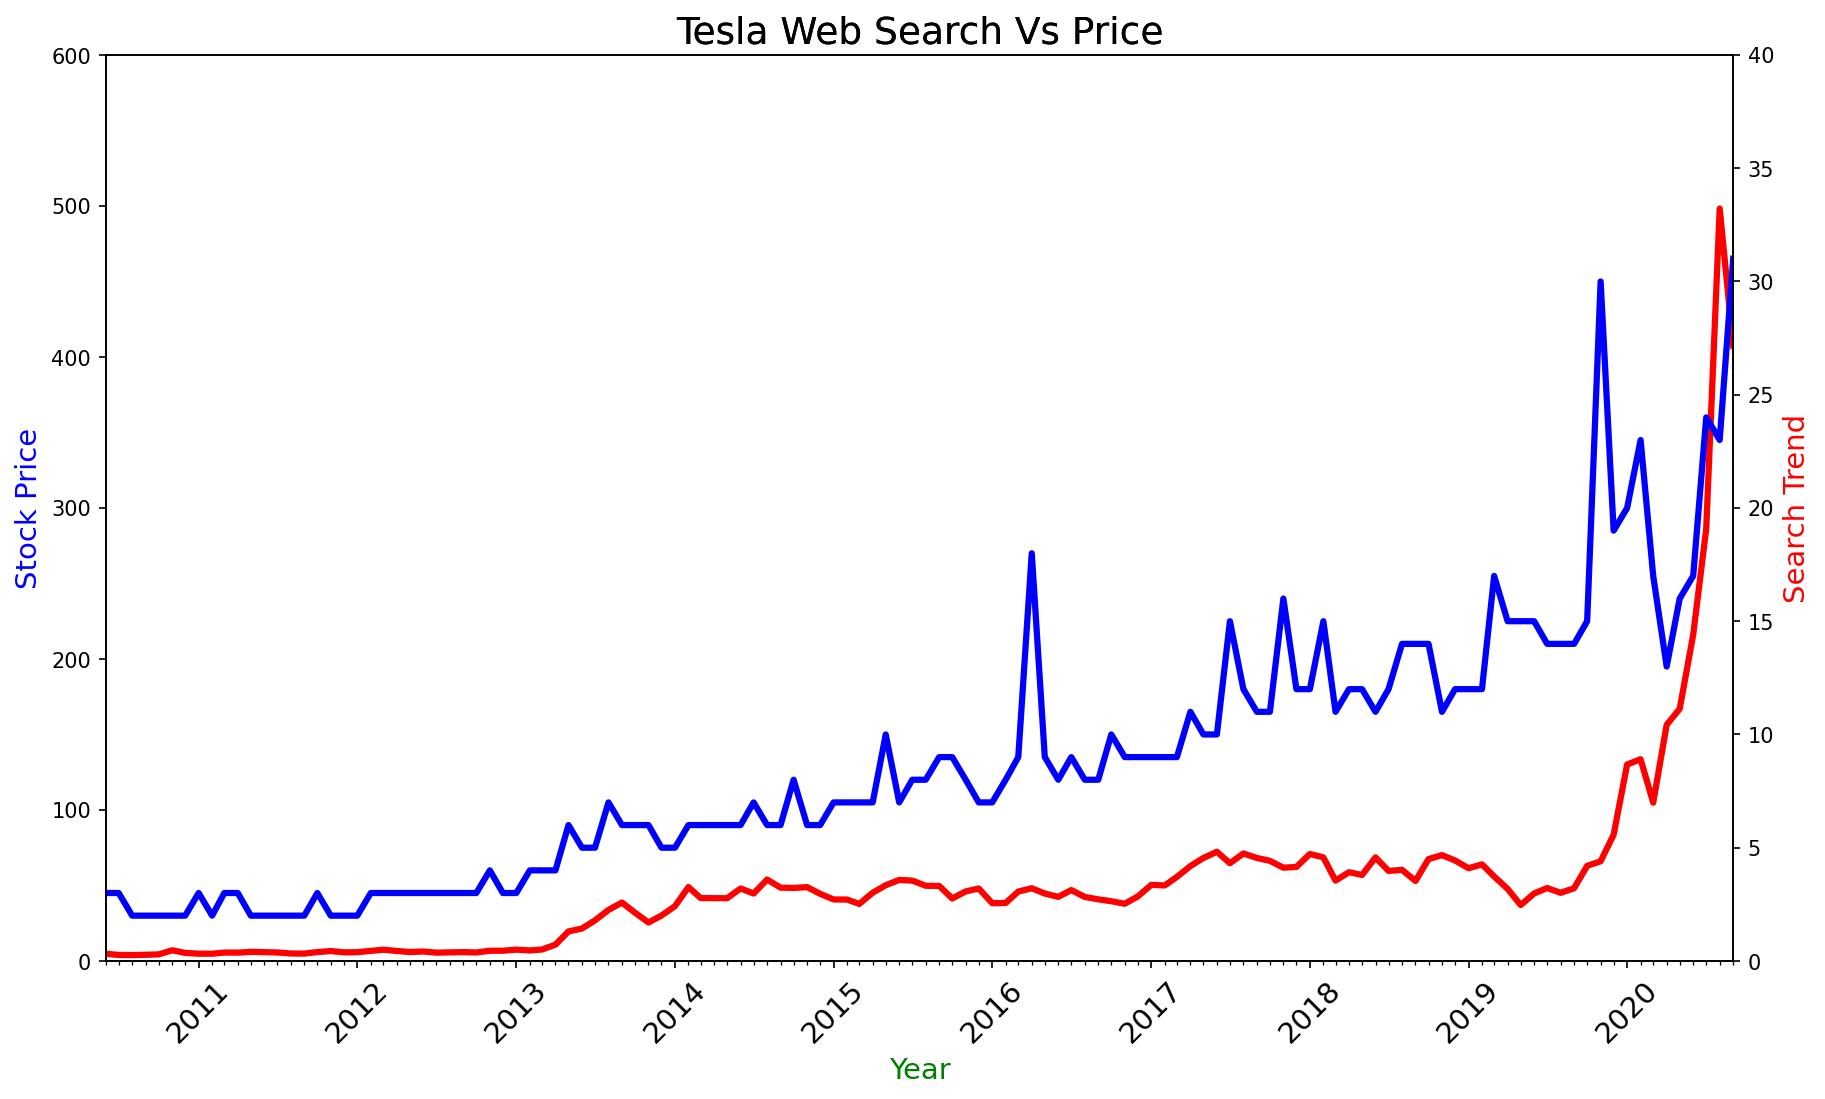

In [33]:
# Change figure size and resolution

plt.figure(figsize=(14, 8), dpi=150)

# Title
plt.title("Tesla Web Search Vs Price", fontsize=18)

# Increase the size and rotate the labels on the x-axis.

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca() # get current axis
ax2 = plt.twinx() # create another axis that shares the same x axis.

# add locators for ticks on the x-axis
# format the ticks

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("Stock Price", fontsize=14, color='b')
ax2.set_ylabel("Search Trend", fontsize=14, color="r");
plt.title("Tesla Web Search Vs Price", fontsize=18)

ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim(0, 600)
ax2.set_ylim(0, 40)

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='r', linewidth=3);
ax2.plot(df_tesla['MONTH'], df_tesla["TSLA_WEB_SEARCH"], color="b", linewidth=3);

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

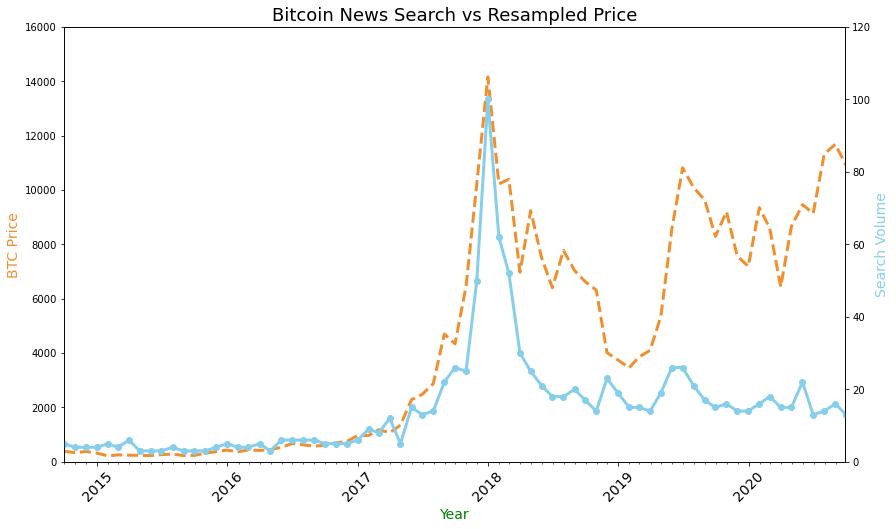

In [34]:
plt.figure(figsize=(14, 8))

plt.xticks(fontsize=14, rotation=45)

plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# add locators for ticks on the x-axis
# format the ticks

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("BTC Price", fontsize=14, color='#F08F2E')
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue");


ax1.set_xlim([df_btc_price.DATE.min(), df_btc_price.DATE.max()])
ax1.set_ylim(0, 16000)
ax2.set_ylim(0, 120)

ax1.plot(df_btc_price.index, df_btc_price['CLOSE'], color="#F08F2E", linewidth=3, linestyle="--");
ax2.plot(df_btc_search_monthly.index, df_btc_search_monthly['BTC_NEWS_SEARCH'], color="skyblue", linewidth=3, marker="o");

plt.show()

**Insight**

<li> Increase in  Bitcoin search results in increase in Bitcoin price especially in 2018 as displayed above.  </li>

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

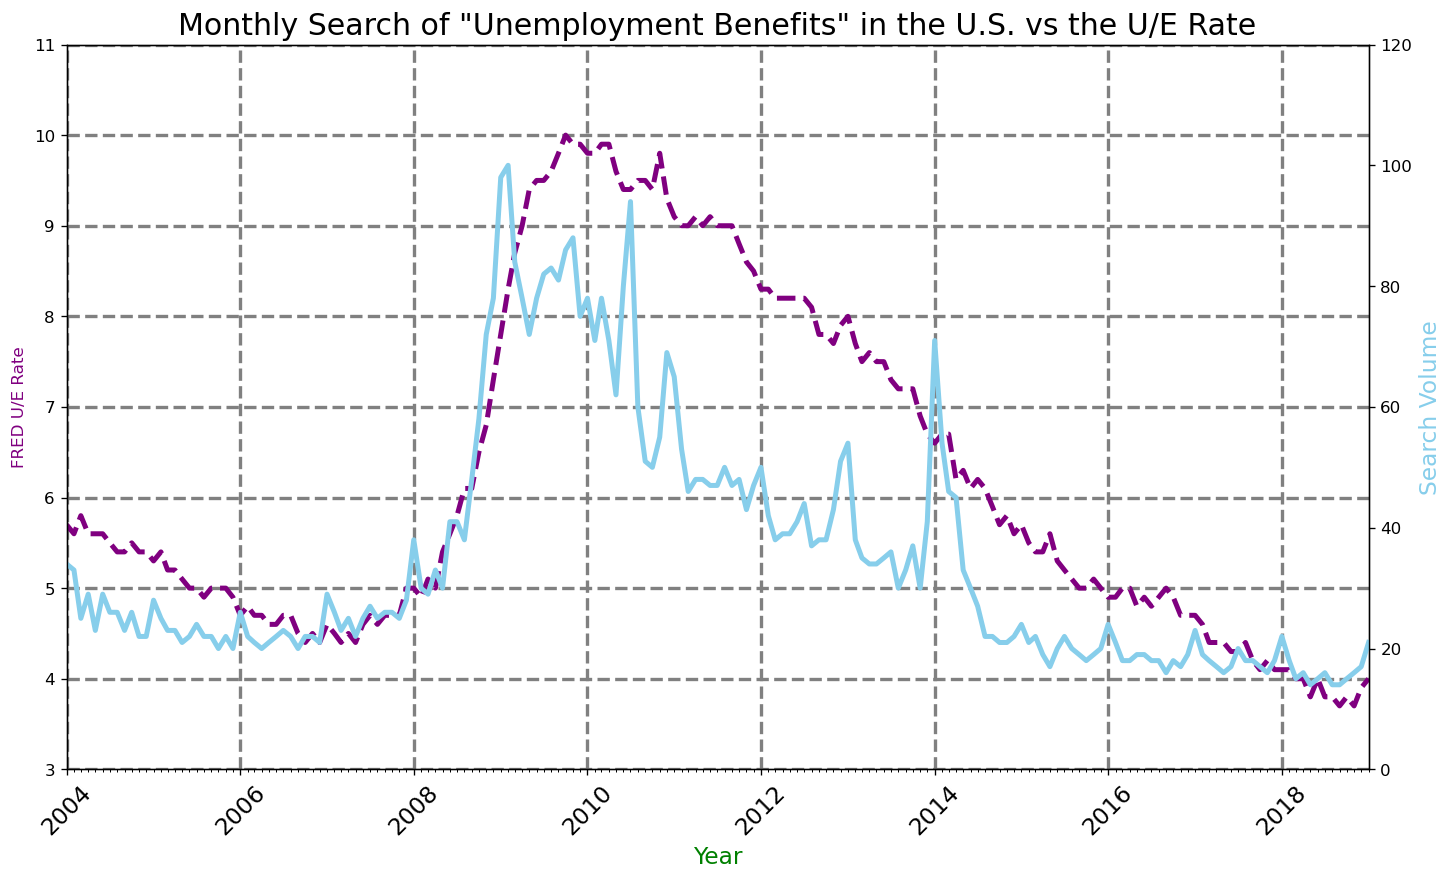

In [35]:
plt.figure(figsize=(14, 8), dpi=120)

plt.xticks(fontsize=14, rotation=45)

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Add grid

ax1.grid(color="grey", linestyle='--', linewidth=2)

# add locators for ticks on the x-axis
# format the ticks

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("FRED U/E Rate", color='purple')
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue");
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylim(bottom=3, top=11)
ax2.set_ylim(bottom=0, top=120)


ax1.plot(df_unemployment.MONTH, df_unemployment['UNRATE'], color="purple", linewidth=3, linestyle="--");
ax2.plot(df_unemployment.MONTH, df_unemployment['UE_BENEFITS_WEB_SEARCH'], color="skyblue", linewidth=3, linestyle="-");

plt.show()



**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


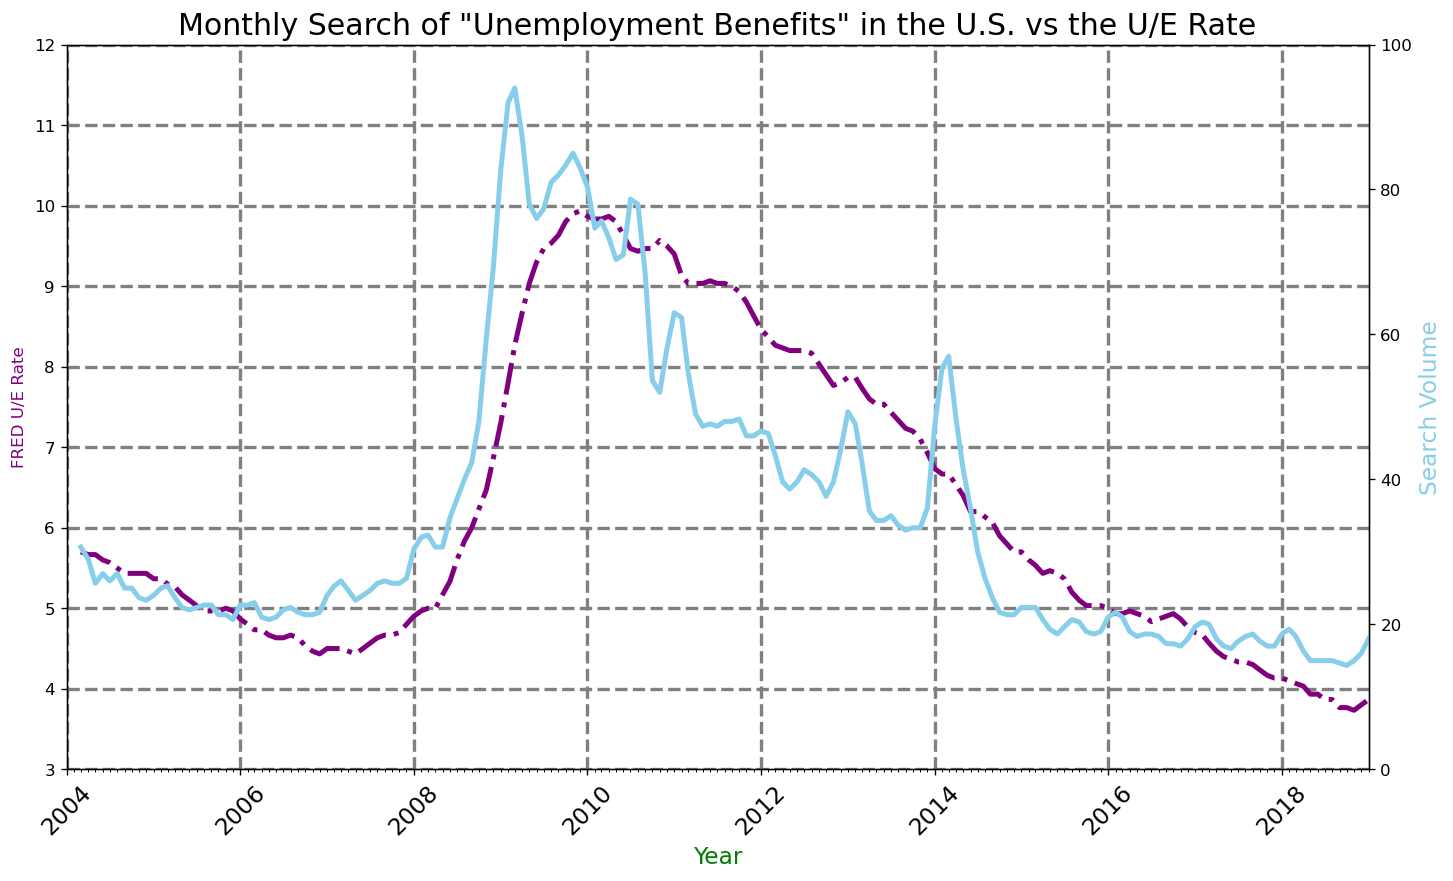

In [36]:
# smoothing data using rolling average
# 3 Month Window

rolling_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', "UNRATE"]].rolling(window=3).mean()

plt.figure(figsize=(14, 8), dpi=120)

plt.xticks(fontsize=14, rotation=45)

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Add grid

ax1.grid(color="grey", linestyle='--', linewidth=2)

# add locators for ticks on the x-axis
# format the ticks

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("FRED U/E Rate", color='purple')
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue");


ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
ax1.set_ylim(bottom=3, top=12)
ax2.set_ylim(bottom=0, top=100)


ax1.plot(df_unemployment.MONTH, rolling_df['UNRATE'], color="purple", linewidth=3, linestyle="-.");
ax2.plot(df_unemployment.MONTH, rolling_df['UE_BENEFITS_WEB_SEARCH'], color="skyblue", linewidth=3, linestyle="-");

plt.show()

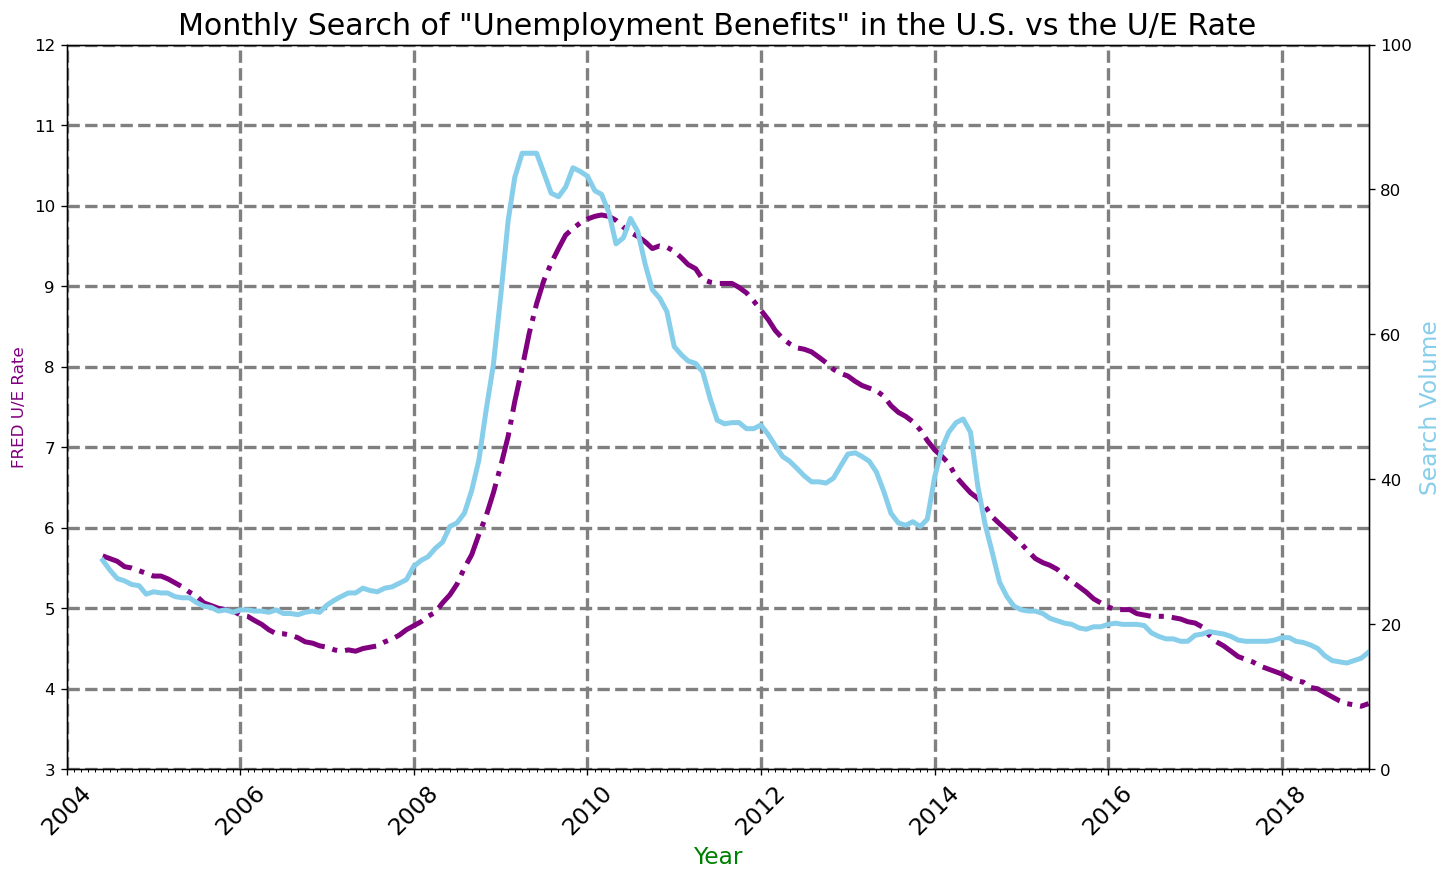

In [37]:
# smoothing data using rolling average
# 6 Month Window

rolling_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', "UNRATE"]].rolling(window=6).mean()

plt.figure(figsize=(14, 8), dpi=120)

plt.xticks(fontsize=14, rotation=45)

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Add grid

ax1.grid(color="grey", linestyle='--', linewidth=2)

# add locators for ticks on the x-axis
# format the ticks

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("FRED U/E Rate", color='purple')
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue");


ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
ax1.set_ylim(bottom=3, top=12)
ax2.set_ylim(bottom=0, top=100)


ax1.plot(df_unemployment.MONTH, rolling_df['UNRATE'], color="purple", linewidth=3, linestyle="-.");
ax2.plot(df_unemployment.MONTH, rolling_df['UE_BENEFITS_WEB_SEARCH'], color="skyblue", linewidth=3, linestyle="-");

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [38]:
df_benefits_search = pd.read_csv("google_trends/UE Benefits Search vs UE Rate 2004-20.csv")
df_benefits_search.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [39]:
# Convert Month object to Datetime

df_benefits_search['MONTH'] = pd.to_datetime(df_benefits_search['MONTH'])

In [40]:
# Convert Daily Data to Monthly Data

df_benefits_search = df_benefits_search.resample("M", on="MONTH").last()
df_benefits_search.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
MONTH,,,
2004-01-31,2004-01-01,9,5.7
2004-02-29,2004-02-01,8,5.6
2004-03-31,2004-03-01,7,5.8
2004-04-30,2004-04-01,8,5.6
2004-05-31,2004-05-01,6,5.6


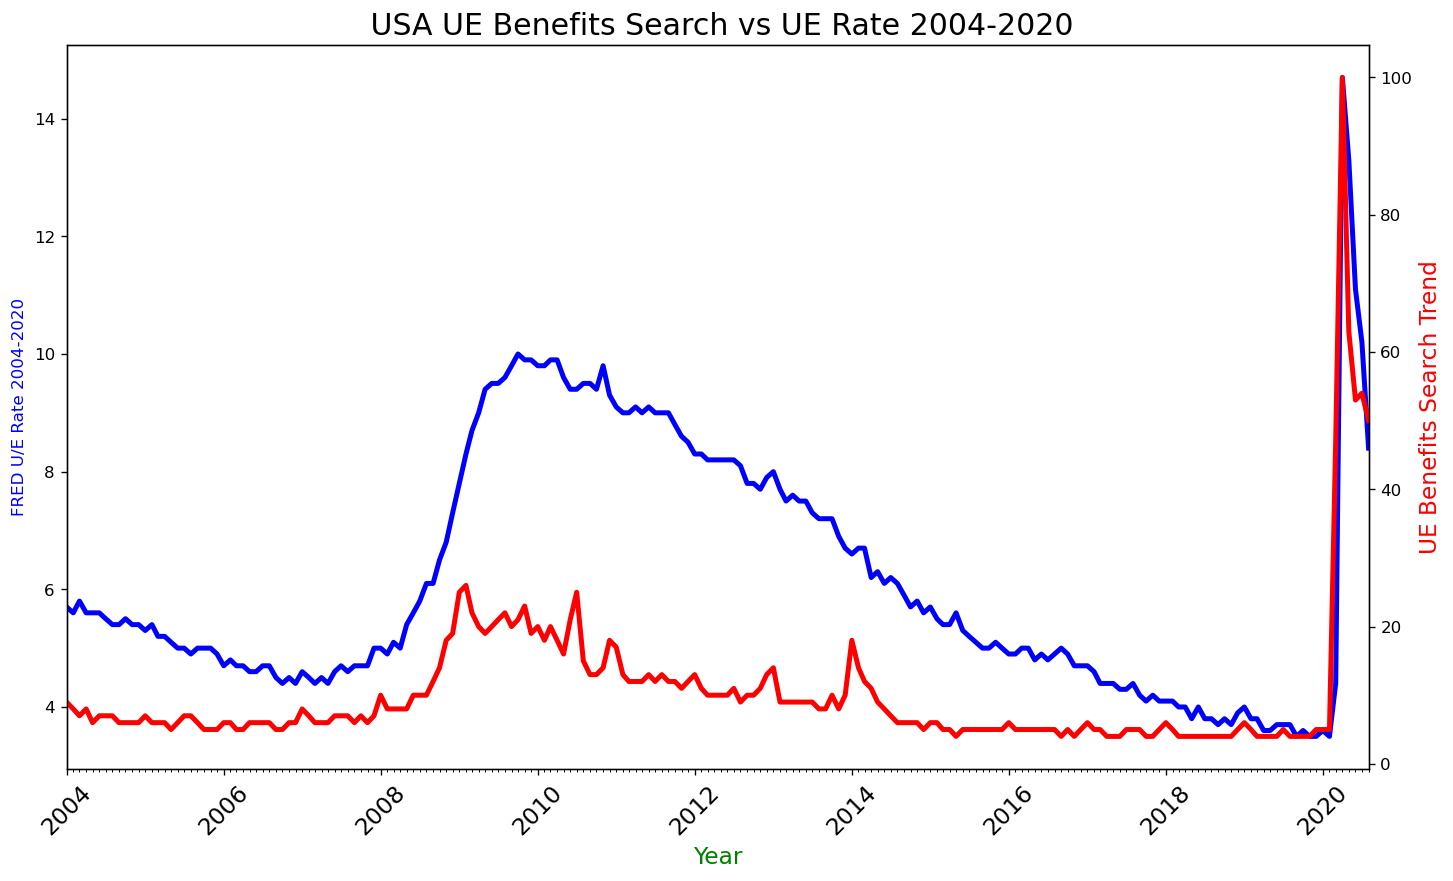

In [45]:
# Chart

plt.figure(figsize=(14, 8), dpi=120)

plt.xticks(fontsize=14, rotation=45)

plt.title(" USA UE Benefits Search vs UE Rate 2004-2020", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()


# ax1.grid(color="grey", linestyle='--', linewidth=2)

# add locators for ticks on the x-axis
# format the ticks

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel("Year", fontsize=14, color='g')
ax1.set_ylabel("FRED U/E Rate 2004-2020", color='b')
ax2.set_ylabel("UE Benefits Search Trend", fontsize=14, color="r");


ax1.set_xlim([df_benefits_search.MONTH.min(), df_benefits_search.MONTH.max()])


ax1.plot(df_benefits_search.MONTH, df_benefits_search['UNRATE'], color="b", linewidth=3, linestyle="-");
ax2.plot(df_benefits_search.MONTH, df_benefits_search["UE_BENEFITS_WEB_SEARCH"], color='r', linewidth=3, linestyle="-");

plt.show()